In [2]:
import cv2
import numpy as np

In [2]:
class Point(object):
    def __init__(self,x,y):
        self.x = x
        self.y = y

    def getX(self):
        return self.x
    def getY(self):
        return self.y

In [3]:
def getGrayDiff(img, currentPoint, tmpPoint):
    return abs(int(img[currentPoint.x,currentPoint.y]) - int(img[tmpPoint.x,tmpPoint.y]))

In [4]:
def selectConnects(p):
    if p != 0:
        connects = [Point(-1, -1), Point(0, -1), Point(1, -1), Point(1, 0), Point(1, 1), \
            Point(0, 1), Point(-1, 1), Point(-1, 0)]
    else:
        connects = [ Point(0, -1), Point(1, 0),Point(0, 1), Point(-1, 0)]
    return connects

In [5]:
def regionGrow(img,seeds,thresh,p = 1):
    height, weight = img.shape
    seedMark = np.zeros(img.shape)
    seedList = []
    for seed in seeds:
        seedList.append(seed)

    label = 1
    connects = selectConnects(p)

    while(len(seedList)>0):
        currentPoint = seedList.pop(0)

        seedMark[currentPoint.x,currentPoint.y] = label
        for i in range(8):
            tmpX = currentPoint.x + connects[i].x
            tmpY = currentPoint.y + connects[i].y
            if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight:
                continue
            grayDiff = getGrayDiff(img,currentPoint,Point(tmpX,tmpY))
            if grayDiff < thresh and seedMark[tmpX,tmpY] == 0:
                seedMark[tmpX,tmpY] = label
                seedList.append(Point(tmpX,tmpY))
    return seedMark

In [38]:
img = cv2.imread('layouts/test1.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
seeds = [Point(412, 510), Point(518, 496), Point(730, 787)]
binary_img = regionGrow(gray_img, seeds, 10)
cv2.imshow('', binary_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
img.shape
img[1000, 500, 1]

(1046, 1405, 3)

In [35]:
gray_img[100, 100]

0

In [36]:
h, w = gray_img.shape
for i in range(h):
    for j in range(w):
        if gray_img[i, j] != 0:
            print(i, j)
        # else:
        #     print(i, j, img[i, j])

251 1051
251 1052
252 944
252 945
252 962
252 963
252 964
252 1014
252 1015
252 1016
252 1050
252 1051
252 1052
252 1053
253 943
253 944
253 945
253 946
253 962
253 963
253 964
253 965
253 991
253 992
253 1001
253 1002
253 1003
253 1013
253 1014
253 1015
253 1016
253 1050
253 1051
253 1052
253 1053
254 943
254 944
254 945
254 946
254 951
254 952
254 962
254 963
254 964
254 965
254 970
254 971
254 972
254 980
254 981
254 982
254 990
254 991
254 992
254 993
254 1001
254 1002
254 1003
254 1004
254 1013
254 1014
254 1015
254 1016
254 1023
254 1024
254 1025
254 1035
254 1036
254 1050
254 1051
254 1052
254 1053
255 943
255 944
255 945
255 946
255 950
255 951
255 952
255 953
255 963
255 964
255 969
255 970
255 971
255 972
255 973
255 979
255 980
255 981
255 982
255 990
255 991
255 992
255 993
255 1001
255 1002
255 1003
255 1004
255 1014
255 1015
255 1023
255 1024
255 1025
255 1026
255 1034
255 1035
255 1036
255 1037
255 1059
255 1060
256 932
256 933
256 934
256 950
256 951
256 952
256 953
256

In [2]:
import os 
import sys
import cv2
import numpy as np
import pandas as pd
from descartes import PolygonPatch
import matplotlib.pyplot as plt
import alphashape


In [ ]:
v = cv2.imread("layouts/test1.png")
cv2.imshow('', v)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
img = cv2.imread('layouts/erode-mail.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# len(get_points(img_small))
cv2.imshow('', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
img = cv2.imread('layouts/eroded-layout-2.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# len(get_points(img_small))
cv2.imshow('', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
img_dilated = cv2.imread('layouts/dilated.png')

In [17]:
def get_points(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    h, w = gray.shape
    points = []
    for i in range(h):
        for j in range(w):
            if gray[i, j] != 0:
                points.append((i, j))
    return points

In [18]:
pts = get_points(img_dilated)
len(pts)

22673

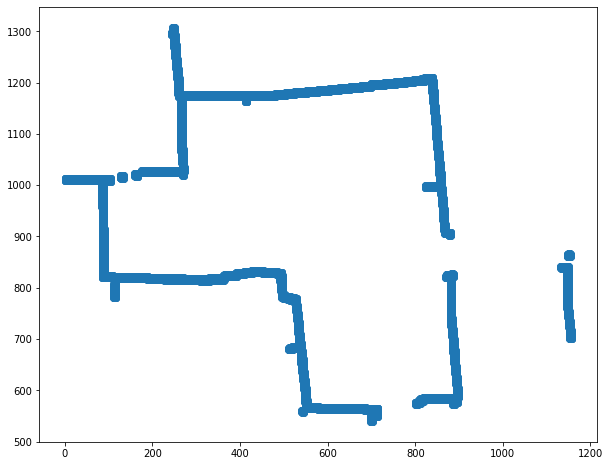

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(*zip(*pts))
plt.show()

In [13]:
# alpha_shape = alphashape.alphashape(pts)

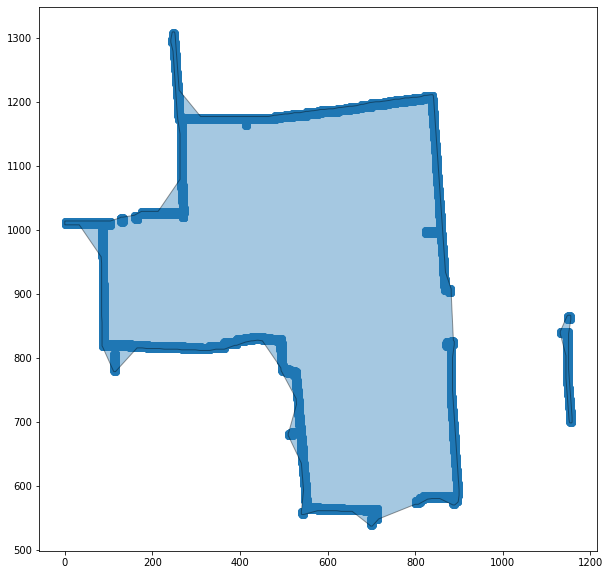

<Figure size 432x288 with 0 Axes>

In [36]:
alpha_shape = alphashape.alphashape(pts, 0.02)
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(*zip(*pts))
ax.add_patch(PolygonPatch(alpha_shape, alpha=0.4))
plt.show()
fig.savefig('layouts/alpha-shape.png')

In [73]:
type(alpha_shape)

shapely.geometry.multipolygon.MultiPolygon

In [77]:
# alpha_shape = alphashape.alphashape(points_2d)

In [ ]:
def alpha_shape(points, alpha):
    """
    Compute the alpha shape (concave hull) of a set
    of points.
    @param points: Iterable container of points.
    @param alpha: alpha value to influence the
        gooeyness of the border. Smaller numbers
        don't fall inward as much as larger numbers.
        Too large, and you lose everything!
    """
    if len(points) < 4:
        # When you have a triangle, there is no sense
        # in computing an alpha shape.
        return geometry.MultiPoint(list(points)).convex_hull

    coords = np.array([point.coords[0] for point in points])
    tri = Delaunay(coords)
    triangles = coords[tri.vertices]
    a = ((triangles[:,0,0] - triangles[:,1,0]) ** 2 + (triangles[:,0,1] - triangles[:,1,1]) ** 2) ** 0.5
    b = ((triangles[:,1,0] - triangles[:,2,0]) ** 2 + (triangles[:,1,1] - triangles[:,2,1]) ** 2) ** 0.5
    c = ((triangles[:,2,0] - triangles[:,0,0]) ** 2 + (triangles[:,2,1] - triangles[:,0,1]) ** 2) ** 0.5
    s = ( a + b + c ) / 2.0
    areas = (s*(s-a)*(s-b)*(s-c)) ** 0.5
    circums = a * b * c / (4.0 * areas)
    filtered = triangles[circums < (1.0 / alpha)]
    edge1 = filtered[:,(0,1)]
    edge2 = filtered[:,(1,2)]
    edge3 = filtered[:,(2,0)]
    edge_points = np.unique(np.concatenate((edge1,edge2,edge3)), axis = 0).tolist()
    m = geometry.MultiLineString(edge_points)
    triangles = list(polygonize(m))
    return cascaded_union(triangles), edge_points